In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi(beta):
    return 2*beta - np.arcsin(4/3 * np.sin(beta))

/var/folders/hq/lnf00brj77b5d2m5m3ftbyvr0000gn/T/ipykernel_73508/2191860468.py:2: RuntimeWarning: invalid value encountered in arcsin
  return 2*beta - np.arcsin(4/3 * np.sin(beta))


Text(0, 0.5, '$\\phi(\\beta)$ (degrees)')

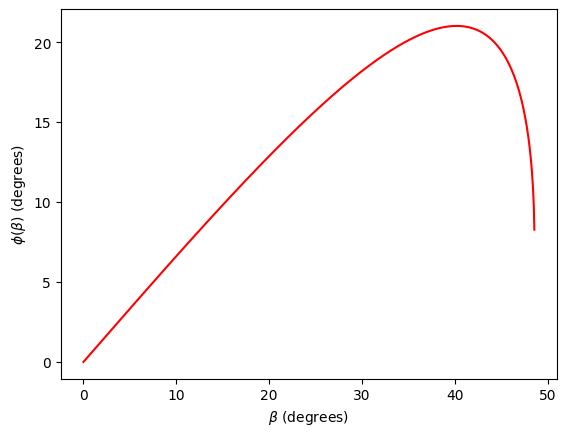

In [3]:
beta = np.linspace(0, 1, 1000)
plt.plot(np.rad2deg(beta), np.rad2deg(phi(beta)), c= 'r')
plt.xlabel(r"$\beta$ (degrees)")
plt.ylabel(r"$\phi(\beta)$ (degrees)", )

## Can we analytically compute that maximum?
Yes!

In [4]:
import sympy as sp

### First, calculate $\frac{d\phi}{d\beta}$:

In [5]:
beta = sp.Symbol('beta')
phi_sym = 2*beta - sp.asin(4/3 * sp.sin(beta))
dphi_dbeta = sp.diff(phi_sym)
dphi_dbeta

2 - 1.0*cos(beta)/sqrt(0.5625 - sin(beta)**2)

### Then, set  $\frac{d\phi}{d\beta} = 0$:

In [6]:
solutions = sp.solve(dphi_dbeta, beta)
solutions

[-0.701674123787604, 0.701674123787604]

### The positive solution is $\beta_0$, which locates the maximum. From there we can get $\phi_\text{max}$:

In [7]:
# we take the positive root
beta_0 = float(solutions[1])
phi_max = np.rad2deg(phi(beta_0))
phi_max

21.01482943284885

### So then the total refraction of the drop is 2$\phi_\text{max}$, or

In [8]:
2*phi_max

42.0296588656977

### Bonus plot (if time allows): can we use dispersion to see where the maxima of these angles lie?
### Yes!

In [9]:
COLOR = {
'RED':1.33,
'ORANGE':1.3339,
'YELLOW':1.33472,
'GREEN':1.33659,
'BLUE':1.34055,
'PURPLE':1.34451,
}

/var/folders/hq/lnf00brj77b5d2m5m3ftbyvr0000gn/T/ipykernel_73508/3399530793.py:3: RuntimeWarning: invalid value encountered in arcsin
  y = 2*beta - np.arcsin(COLOR.get(color) * np.sin(beta))


Text(0, 0.5, '$\\phi(\\beta)$ (degrees)')

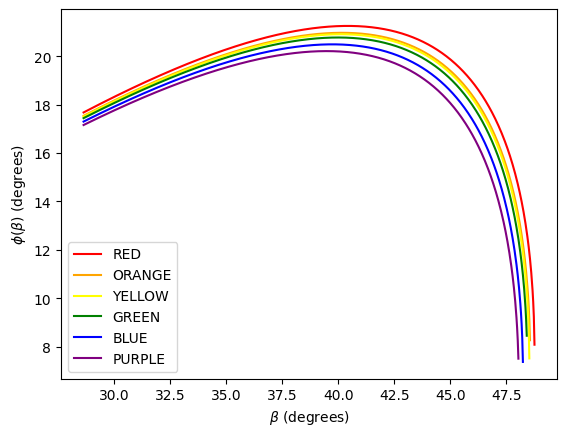

In [10]:
beta = np.linspace(2/4, 2/2, 1000)
for color in COLOR.keys():
    y = 2*beta - np.arcsin(COLOR.get(color) * np.sin(beta))
    plt.plot(np.rad2deg(beta), np.rad2deg(y), c = color, label = f'{color}')
plt.legend()
plt.xlabel(r"$\beta$ (degrees)")
plt.ylabel(r"$\phi(\beta)$ (degrees)", )